# Examples 1

Here are some examples to demonstrate how to use the HYPEHD package. The test datasets are open source data from [https://github.com/insightsengineering/scda.2022](https://github.com/insightsengineering/scda.2022) website.

## Imports

In [1]:
import hypehd
from hypehd import visualization as vis
from hypehd import data_manipulation as da

## Read test data
dm is a dataset including a set of essential standard variables (age, sex, race...) that describe each subject.
vs is a longitudinal dataset including a set of vital signs records per each patient, each visit.

In [2]:
# read into dataframe dm from package
my_file = hypehd.PACKAGEDIR / 'data' / 'demographic.csv'
dm=da.read("csv", my_file)
dm.head()

,Unnamed: 0,STUDYID,USUBJID,SUBJID,SITEID,AGE,AGEU,SEX,RACE,ETHNIC,...,DCSREAS,DTHDT,DTHCAUS,DTHCAT,LDDTHELD,LDDTHGR1,LSTALVDT,DTHADY,ADTHAUT,study_duration_secs
0,1,AB12345,AB12345-CHN-3-id-128,id-128,CHN-3,32,YEARS,M,ASIAN,HISPANIC OR LATINO,...,DEATH,2022-03-06,ADVERSE EVENT,ADVERSE EVENT,22.0,<=30,2022-03-06,1106.0,Yes,63113904
1,2,AB12345,AB12345-CHN-15-id-262,id-262,CHN-15,35,YEARS,M,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-17,NaN,NaN,63113904
2,3,AB12345,AB12345-RUS-3-id-378,id-378,RUS-3,30,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-11,NaN,NaN,63113904
3,4,AB12345,AB12345-CHN-11-id-220,id-220,CHN-11,26,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-26,NaN,NaN,63113904
4,5,AB12345,AB12345-CHN-7-id-267,id-267,CHN-7,40,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,NaN,NaN,63113904


In [3]:
# read into dataframe vs from package
my_file = hypehd.PACKAGEDIR / 'data' / 'vital_signs.csv'
vs=da.read("csv", my_file)
vs.head()

,USUBJID,PARAM,PARAMCD,AVAL,AVALU,ADTM,ADY,ATPTN,AVISIT,AVISITN
0,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,39.038337,Pa,2020/10/15 1:00,221,1,SCREENING,-1
1,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,55.497804,Pa,2021/12/6 0:00,638,1,BASELINE,0
2,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,50.438759,Pa,2020/12/19 0:00,286,1,WEEK 1 DAY 8,1
3,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,54.408067,Pa,2020/11/28 0:00,265,1,WEEK 2 DAY 15,2
4,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,45.341591,Pa,2021/7/10 1:00,489,1,WEEK 3 DAY 22,3


## Filter the dataset
filter vs dataset to select only weight records and merge it with dm dataset using`data_selection()` function in data_manipulation

In [4]:
test = da.data_selection(keep_col=["USUBJID", "PARAMCD", "AVAL", "AVISITN"], sort_by=["SEX", "AGE"], sort_asc=True,
                         input_data=vs, cond='PARAMCD=="WEIGHT"', merge_data=dm, merge_by="USUBJID",
                         merge_keep_col=["USUBJID", "ITTFL", "SEX", "AGE", "TRT01P"])
test.head()

,USUBJID,PARAMCD,AVAL,AVISITN,ITTFL,SEX,AGE,TRT01P
1631,AB12345-CHN-5-id-160,WEIGHT,48.578366,-1,Y,F,21,C: Combination
1632,AB12345-CHN-5-id-160,WEIGHT,46.529763,0,Y,F,21,C: Combination
1633,AB12345-CHN-5-id-160,WEIGHT,55.107222,1,Y,F,21,C: Combination
1634,AB12345-CHN-5-id-160,WEIGHT,51.847507,2,Y,F,21,C: Combination
1635,AB12345-CHN-5-id-160,WEIGHT,53.882043,3,Y,F,21,C: Combination


## Derive baseline info
using `derive_baseline()` function in data_manipulation calculate change from baseline, percent change from baseline of weight per each subject

In [5]:
test = da.derive_baseline(input_data=test, by_vars=["USUBJID", "PARAMCD"], value="AVAL", chg=True, pchg=True,
                          base_visit='AVISITN==0')
test.head()

,USUBJID,PARAMCD,AVAL,AVISITN,ITTFL,SEX,AGE,TRT01P,base,chg,pchg
0,AB12345-CHN-5-id-160,WEIGHT,48.578366,-1,Y,F,21,C: Combination,46.529763,2.048603,0.044028
1,AB12345-CHN-5-id-160,WEIGHT,46.529763,0,Y,F,21,C: Combination,46.529763,0.000000,0.000000
2,AB12345-CHN-5-id-160,WEIGHT,55.107222,1,Y,F,21,C: Combination,46.529763,8.577459,0.184343
3,AB12345-CHN-5-id-160,WEIGHT,51.847507,2,Y,F,21,C: Combination,46.529763,5.317745,0.114287
4,AB12345-CHN-5-id-160,WEIGHT,53.882043,3,Y,F,21,C: Combination,46.529763,7.352281,0.158012


## Generate line plots for longitudinal data
using `longitudinal_graph()` function in visualization to generate plots of change from baseline, percent change from baseline by different visits

([<Figure size 1080x648 with 1 Axes>, <Figure size 1080x648 with 1 Axes>],
 [<AxesSubplot: title={'center': 'Line plot and summary table for Chg'}, ylabel='chg'>,
  <AxesSubplot: title={'center': 'Line plot and summary table for Pchg'}, ylabel='pchg'>])

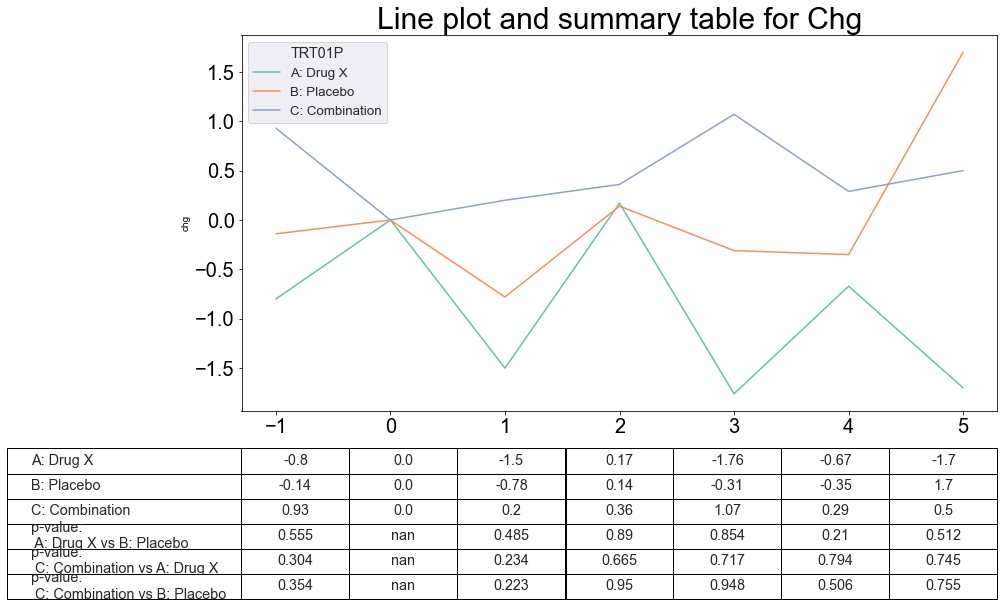

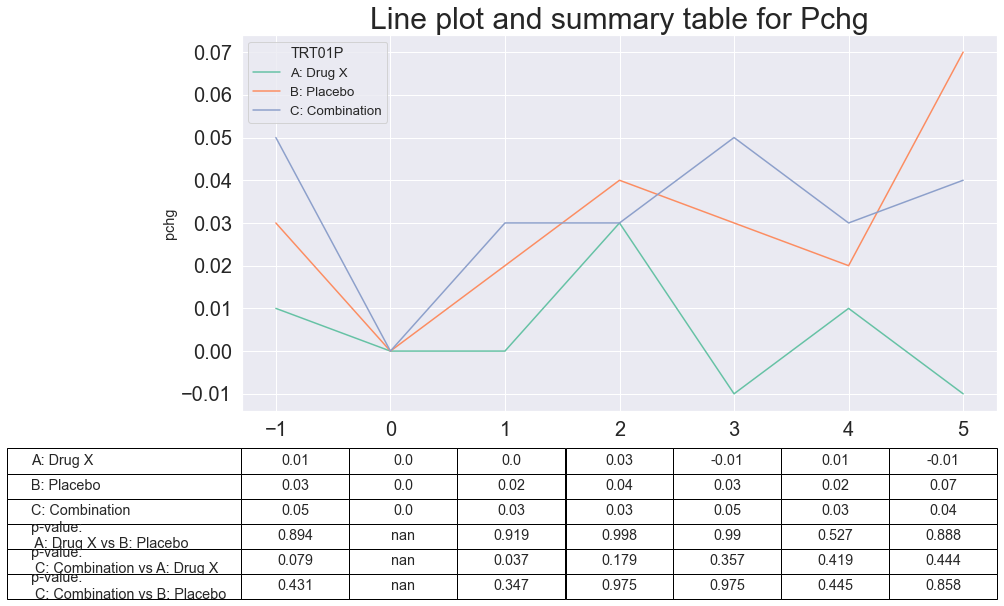

In [6]:
vis.longitudinal_graph(outcome=["chg", "pchg"], time="AVISITN", group="TRT01P", input_data=test)

## Derive extreme flags
using `derive_extreme_flag()` function to get the last and max records per each patient

In [7]:
df = da.derive_extreme_flag(input_data=vs, by_vars=['USUBJID', 'PARAMCD'], sort_var=['AVISITN'], new_var="last_flag", mode="last", value_var="AVAL")
df = da.derive_extreme_flag(input_data=df, by_vars=['USUBJID', 'PARAMCD'], sort_var=['AVISITN'], new_var="max_flag", mode="max", value_var="AVAL")
df.head(20)

,USUBJID,PARAM,PARAMCD,AVAL,AVALU,ADTM,ADY,ATPTN,AVISIT,AVISITN,last_flag,max_flag
0,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,39.038337,Pa,2020/10/15 1:00,221,1,SCREENING,-1,NaN,NaN
1,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,55.497804,Pa,2021/12/6 0:00,638,1,BASELINE,0,NaN,NaN
2,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,50.438759,Pa,2020/12/19 0:00,286,1,WEEK 1 DAY 8,1,NaN,NaN
3,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,54.408067,Pa,2020/11/28 0:00,265,1,WEEK 2 DAY 15,2,NaN,NaN
4,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,45.341591,Pa,2021/7/10 1:00,489,1,WEEK 3 DAY 22,3,NaN,NaN
5,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,50.297668,Pa,2022/2/4 0:00,698,1,WEEK 4 DAY 29,4,NaN,NaN
6,AB12345-BRA-1-id-105,Diastolic Blood Pressure,DIABP,59.269864,Pa,2020/7/5 1:00,119,1,WEEK 5 DAY 36,5,Y,Y
7,AB12345-BRA-1-id-105,Pulse Rate,PULSE,38.809968,beats/min,2021/12/31 0:00,663,1,SCREENING,-1,NaN,NaN
8,AB12345-BRA-1-id-105,Pulse Rate,PULSE,67.889859,beats/min,2021/9/9 1:00,550,1,BASELINE,0,NaN,Y
9,AB12345-BRA-1-id-105,Pulse Rate,PULSE,45.968851,beats/min,2020/12/16 0:00,283,1,WEEK 1 DAY 8,1,NaN,NaN


## Survival analysis
using `time_to_event()` in data_manipulation to process the time to event variable and using `survival_analysis()` in visualization to generate the KM plot

In [8]:
dm2 = da.time_to_event(input_data=dm, start_date="TRTSDTM", end_date="DTHDT", censor_date="TRTEDTM",
                       new_var='time_to_death', unit='year')
dm2.head()

,Unnamed: 0,STUDYID,USUBJID,SUBJID,SITEID,AGE,AGEU,SEX,RACE,ETHNIC,...,DTHCAT,LDDTHELD,LDDTHGR1,LSTALVDT,DTHADY,ADTHAUT,study_duration_secs,time_to_death,censor_status,unit
0,1,AB12345,AB12345-CHN-3-id-128,id-128,CHN-3,32,YEARS,M,ASIAN,HISPANIC OR LATINO,...,ADVERSE EVENT,22.0,<=30,2022-03-06,1106.0,Yes,63113904,3.03,1,year
1,2,AB12345,AB12345-CHN-15-id-262,id-262,CHN-15,35,YEARS,M,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,2022-03-17,NaN,NaN,63113904,3.00,0,year
2,3,AB12345,AB12345-RUS-3-id-378,id-378,RUS-3,30,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,2022-03-11,NaN,NaN,63113904,3.00,0,year
3,4,AB12345,AB12345-CHN-11-id-220,id-220,CHN-11,26,YEARS,F,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,2022-03-26,NaN,NaN,63113904,3.00,0,year
4,5,AB12345,AB12345-CHN-7-id-267,id-267,CHN-7,40,YEARS,M,ASIAN,NOT HISPANIC OR LATINO,...,NaN,NaN,NaN,2022-03-15,NaN,NaN,63113904,3.00,0,year


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot: title={'center': 'Survival of different TRT01P'}, xlabel='timeline'>)

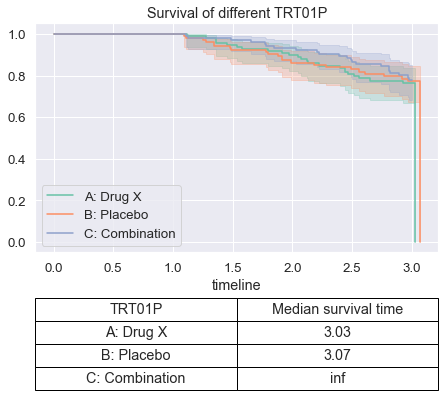

In [9]:
vis.survival_analysis(time="time_to_death", censor_status="censor_status", group="TRT01P", input_data=dm2)